In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [12]:
# Tải dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Chuẩn hóa dữ liệu về khoảng [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Thêm chiều kênh (channel) để phù hợp với CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


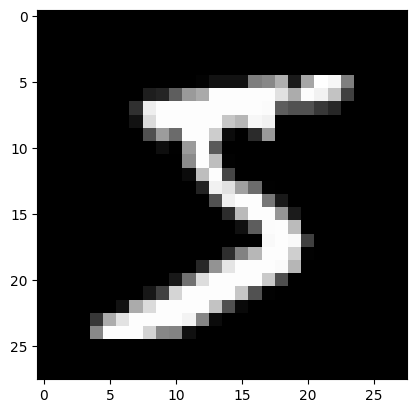

In [11]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()

In [5]:
# Xây dựng mô hình CNN
model = keras.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(10, activation='softmax')
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 138,506 (541.04 KB)

 Trainable params: 138,506 (541.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6980 - loss: 0.8882 - val_accuracy: 0.9819 - val_loss: 0.0578
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9651 - loss: 0.1319 - val_accuracy: 0.9885 - val_loss: 0.0410
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9767 - loss: 0.0870 - val_accuracy: 0.9883 - val_loss: 0.0401
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9833 - loss: 0.0626 - val_accuracy: 0.9908 - val_loss: 0.0330
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9856 - loss: 0.0541 - val_accuracy: 0.9903 - val_loss: 0.0343
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9870 - loss: 0.0447
Độ chính xác trên tập kiểm tra: 0.9903


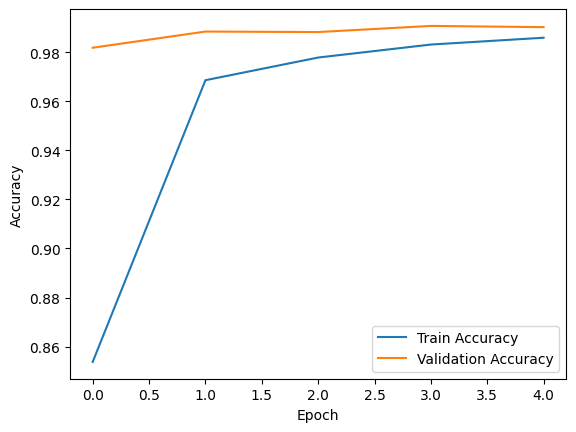

In [6]:
# Huấn luyện mô hình
history = model.fit(x_train, y_train,batch_size=128, epochs=5, validation_data=(x_test, y_test))

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Độ chính xác trên tập kiểm tra: {test_acc:.4f}")

# Vẽ biểu đồ độ chính xác và mất mát
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
!dir /content/drive/MyDrive/deep_learning/image_classification_numbers/img

0.png  1.png  2.png  3.png  4.png  5.png  6.png  7.png	8.png  9.png  random.png



Nhập tên ảnh ('exit' để thoát): random.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Giá trị dự đoán: 3


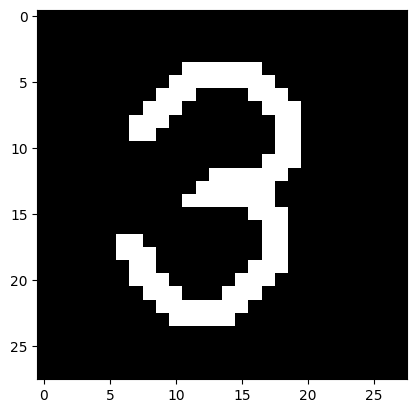


Nhập tên ảnh ('exit' để thoát): 4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Giá trị dự đoán: 4


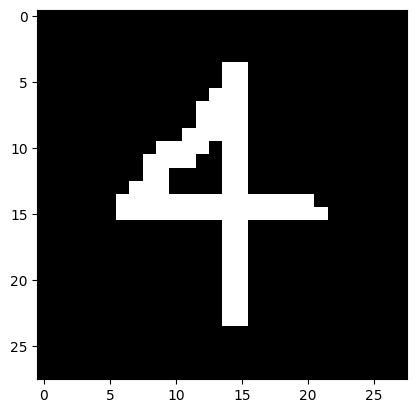


Nhập tên ảnh ('exit' để thoát): 7.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Giá trị dự đoán: 2


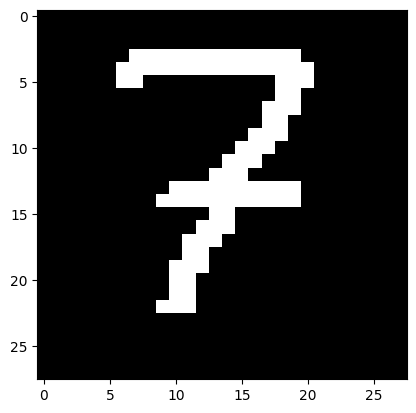


Nhập tên ảnh ('exit' để thoát): 2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Giá trị dự đoán: 2


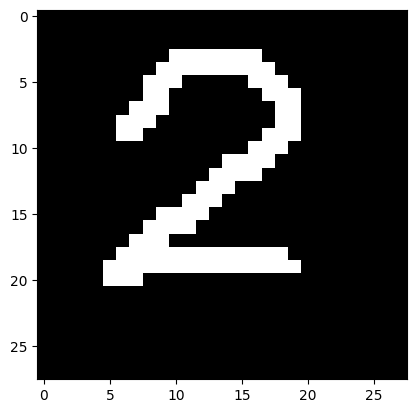


Nhập tên ảnh ('exit' để thoát): 5.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Giá trị dự đoán: 5


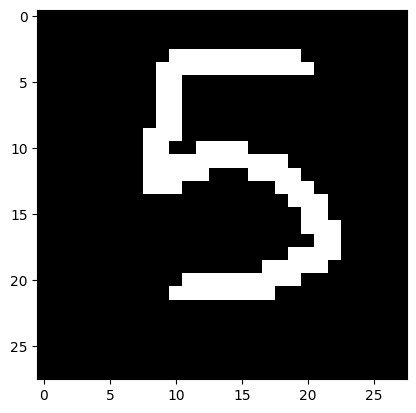


Nhập tên ảnh ('exit' để thoát): 6.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Giá trị dự đoán: 6


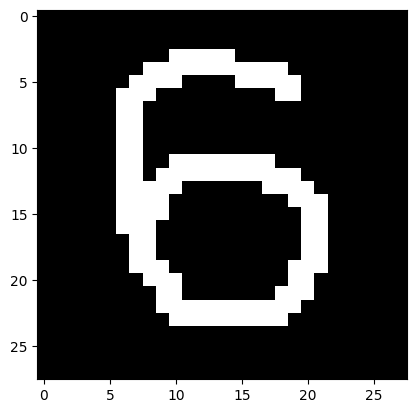


Nhập tên ảnh ('exit' để thoát): 8.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Giá trị dự đoán: 8


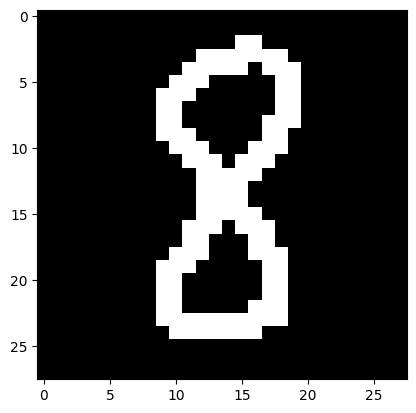


Nhập tên ảnh ('exit' để thoát): 1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Giá trị dự đoán: 1


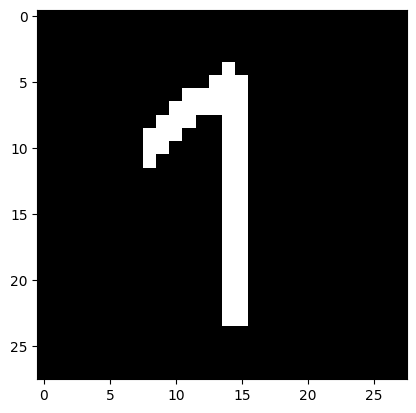


Nhập tên ảnh ('exit' để thoát): exit


In [47]:
import os
import cv2
import numpy as np

img_path = "/content/drive/MyDrive/deep_learning/image_classification_numbers/img/"
def predict_img(name_img: str):
  img = cv2.imread(img_path + name_img, cv2.IMREAD_GRAYSCALE)
  img = np.invert(np.array([img]))
  img = img.reshape(1, 28, 28, 1)
  y_pred = model.predict(img)
  print(f'Giá trị dự đoán: {np.argmax(y_pred)}')
  plt.imshow(img.reshape(28,28), cmap='gray')
  plt.show()

while True:
    user_input = input("\nNhập tên ảnh ('exit' để thoát): ")
    if user_input.lower() == 'exit':
        break
    predict_img(user_input)

